In [62]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import mudata as mu
import celloracle as co
from celloracle.trajectory.oracle_utility import _adata_to_df

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.figsize"] = [6, 4.5]

In [7]:
path_out = "/cellar/users/aklie/data/datasets/paul15/annotated/Paul_etal_15.h5mu"

# Just read

In [59]:
# Load oracle object from tutorial
oracle = co.data.load_tutorial_oracle_object()
oracle

Oracle object

Meta data
    celloracle version used for instantiation: 0.10.0
    n_cells: 2671
    n_genes: 1999
    cluster_name: louvain_annot
    dimensional_reduction_name: X_draw_graph_fa
    n_target_genes_in_TFdict: 21259 genes
    n_regulatory_in_TFdict: 1093 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 90 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 1850 genes
    k_for_knn_imputation: 66
Status
    Gene expression matrix: Ready
    BaseGRN: Ready
    PCA calculation: Done
    Knn imputation: Done
    GRN calculation for simulation: Not finished

In [90]:
len(oracle.TFdict["Myc"])

329

In [60]:
# Grab AnnData out of it
#adata = sc.read_h5ad("/cellar/users/aklie/data/datasets/paul15/annotated/Paul_etal_15.h5ad")
adata = oracle.adata
adata

AnnData object with n_obs × n_vars = 2671 × 1999
    obs: 'paul15_clusters', 'n_counts_all', 'n_counts', 'louvain', 'cell_type', 'louvain_annot', 'Lineage_MEP', 'Lineage_GMP', 'Pseudotime_Lineage_MEP', 'Pseudotime_Lineage_GMP', 'Pseudotime'
    var: 'n_counts', 'symbol', 'isin_top1000_var_mean_genes', 'isin_TFdict_targets', 'isin_TFdict_regulators'
    uns: 'cell_type_colors', 'diffmap_evals', 'draw_graph', 'iroot', 'louvain', 'louvain_annot_colors', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'paul15_clusters_colors', 'pca', 'log1p'
    obsm: 'X_diffmap', 'X_draw_graph_fa', 'X_pca'
    varm: 'PCs'
    layers: 'raw_count', 'normalized_count', 'imputed_count'
    obsp: 'connectivities', 'distances'

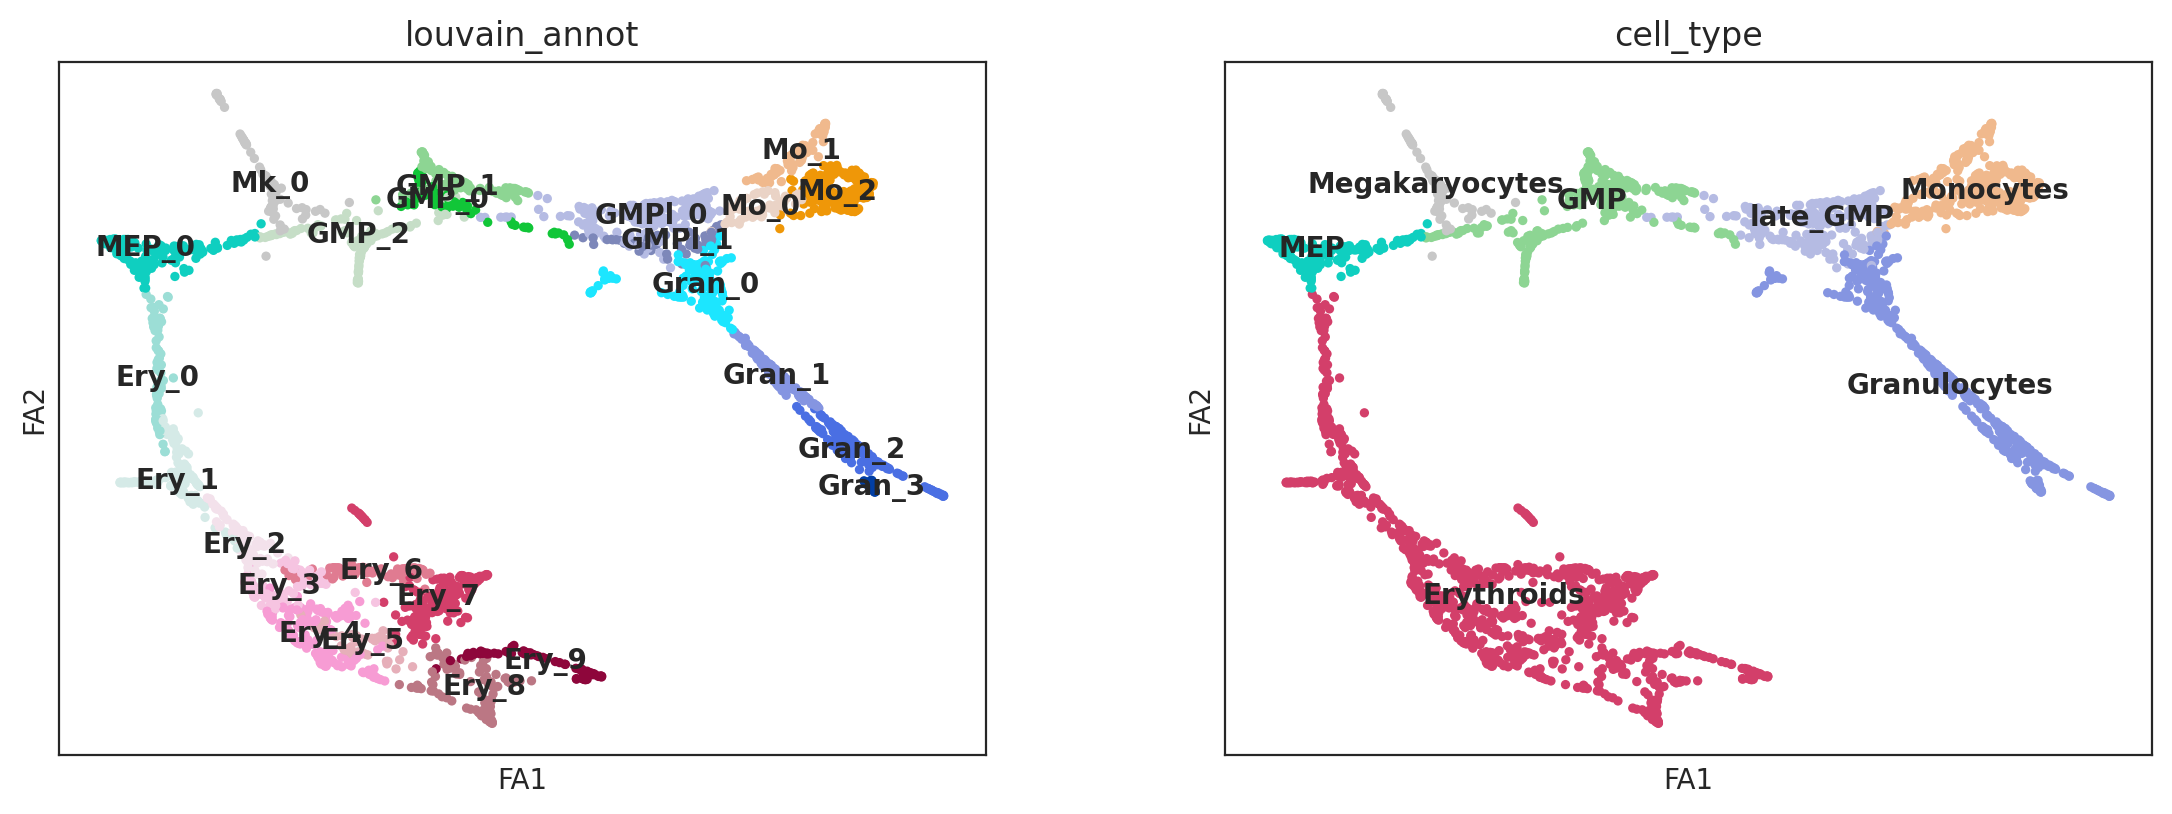

In [61]:
# check result
sc.pl.draw_graph(
    adata, 
    color=['louvain_annot', 'cell_type'],
    legend_loc='on data'
)

In [80]:
# How CellOracle grabs matrix
gem_imputed_std = co.utility.standard(_adata_to_df(adata, "imputed_count"))
gem_imputed_std

,0610007L01Rik,0610010K14Rik,0910001L09Rik,1100001G20Rik,1110004E09Rik,1110007A13Rik,1110013L07Rik,1190002H23Rik,1190007F08Rik,1200002N14Rik,...,Zfpm1,Zmat3,Zmynd11,Zswim4,Zyx,calp80,mKIAA0569,mKIAA1575,mKIAA1994,slc43a2
0,1.219659,4.838833,1.674566,0.000000,0.181064,3.274130,2.996706,0.246123,0.136256,0.000000,...,1.541178,0.000000,3.931339,4.380128,2.452327,3.654659,2.828804,6.570134,1.654623,1.203557
1,3.268105,7.723834,3.186459,0.098639,1.396795,5.331816,1.849354,1.419783,0.052632,1.792440,...,0.167878,0.000000,3.488730,0.231183,1.244875,0.443091,2.678271,1.189440,0.253521,1.980873
2,2.615684,7.577751,1.222686,0.169529,3.992322,4.080469,0.209321,0.817538,1.948397,0.000000,...,2.642418,1.715135,4.786133,1.052163,0.214964,0.000000,2.271423,3.549388,2.778073,0.083068
3,5.047823,7.921588,3.720524,1.068272,2.455170,3.907748,2.186246,2.969559,0.059849,1.905256,...,0.329047,0.000000,4.222632,1.074402,1.086014,1.115605,3.516896,3.788510,0.188061,1.279434
4,2.414120,7.779232,1.346096,0.045070,3.781129,3.172298,0.162729,1.006141,2.216475,0.128367,...,2.667914,1.563247,4.113880,0.527605,0.204203,0.000000,1.916164,3.637557,3.020863,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,3.167403,7.706929,1.163403,0.000000,2.830785,3.731504,0.438675,0.480950,1.967172,0.427297,...,2.233905,0.717749,4.328006,0.307730,0.107929,0.000000,1.088778,2.813298,2.233018,0.179730
2726,2.366680,8.402914,3.944250,0.000000,1.395964,4.526159,1.049856,0.997181,0.097757,1.547644,...,0.206852,0.248192,4.041007,0.527463,1.454318,0.980254,3.174881,2.010661,0.184090,1.476273
2727,0.818998,6.399809,1.747927,0.000000,1.163141,2.542867,5.147326,0.215059,0.136256,0.000000,...,2.137031,2.862040,2.365081,3.092845,3.086608,1.421121,1.159527,3.769782,2.217050,0.000000
2728,4.919505,7.635101,3.891799,1.173696,2.842228,3.878655,2.297284,3.234009,0.000000,2.367413,...,0.323967,0.414187,4.696083,0.922742,1.172341,0.951491,3.083322,2.977047,0.112041,0.955883


In [81]:
# ScanPy version
adata.layers["scaled_imputed_counts"] = sc.pp.scale(
    adata,
    zero_center=False,
    copy=True,
    layer="imputed_count"
).layers["imputed_count"]

In [82]:
# Not the same
np.allclose(adata.layers["scaled_imputed_counts"], gem_imputed_std.values, atol=0.001)

False

In [83]:
# Let's use CellOracle
adata.layers["scaled_imputed_counts"] = co.utility.standard(_adata_to_df(adata, "imputed_count")).values.copy()

In [84]:
mdata = mu.MuData({
    "rna": adata
})
mdata.obs["louvain_annot"] = adata.obs["louvain_annot"].copy()

In [85]:
mdata.write(path_out)

# Try to reproduce

In [3]:
# Download dataset. You can change the code blow to use your data.
adata = sc.datasets.paul15()

/cellar/users/aklie/opt/miniconda3/envs/test_celloracle/lib/python3.10/site-packages/scanpy/datasets/_datasets.py:200: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['iroot'] = 840


In [4]:
# Only consider genes with more than 1 count
sc.pp.filter_genes(adata, min_counts=1)

In [5]:
# Normalize gene expression matrix with total UMI count per cell
sc.pp.normalize_per_cell(adata, key_n_counts='n_counts_all')

In [6]:
# Select top 2000 highly-variable genes
filter_result = sc.pp.filter_genes_dispersion(adata.X,
                                              flavor='cell_ranger',
                                              n_top_genes=2000,
                                              log=False)

# Subset the genes
adata = adata[:, filter_result.gene_subset]

# Renormalize after filtering
sc.pp.normalize_per_cell(adata)

/cellar/users/aklie/opt/miniconda3/envs/test_celloracle/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:523: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell


In [7]:
# keep raw cont data before log transformation
adata.raw = adata
adata.layers["raw_count"] = adata.raw.X.copy()

# Log transformation and scaling
sc.pp.log1p(adata)
sc.pp.scale(adata)

In [8]:
# PCA
sc.tl.pca(adata, svd_solver='arpack')

# Diffusion map
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.diffmap(adata)

# Calculate neihbors again based on diffusionmap
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')

In [9]:
# Cluster
sc.tl.louvain(adata, resolution=0.8)

In [10]:
# PAGA graph construction
sc.tl.paga(adata, groups='louvain')

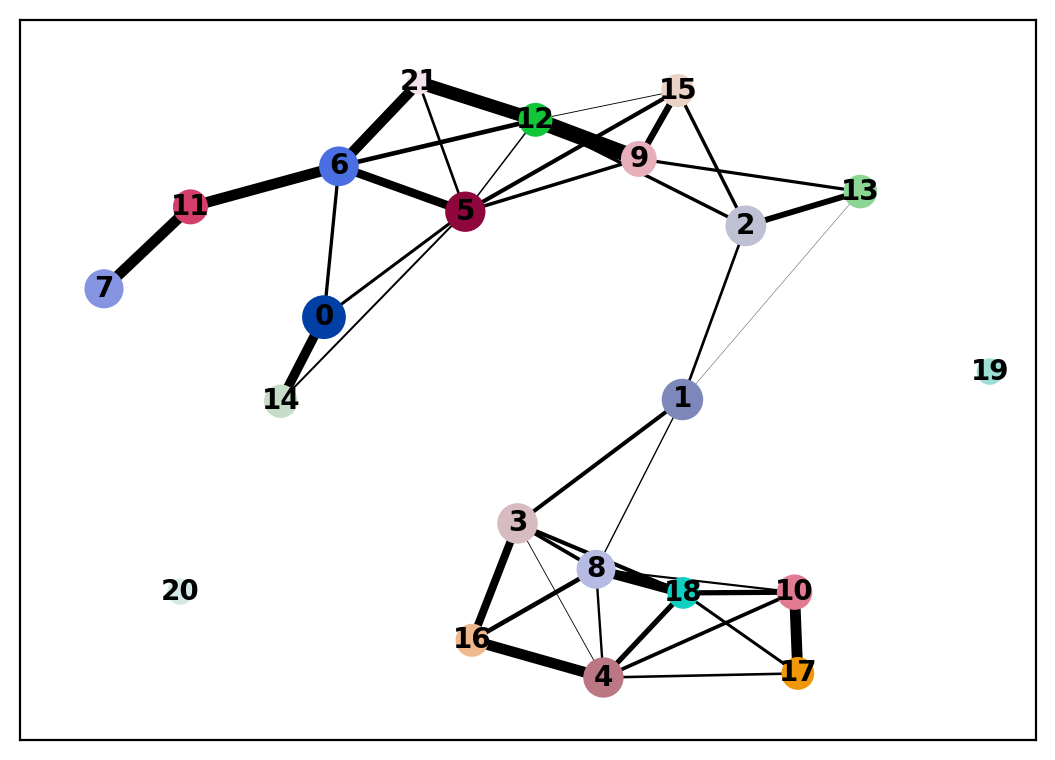

In [11]:
# Plot
plt.rcParams["figure.figsize"] = [6, 4.5]
sc.pl.paga(adata)

In [12]:

sc.tl.draw_graph(adata, init_pos='paga', random_state=123)

/cellar/users/aklie/opt/miniconda3/envs/test_celloracle/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


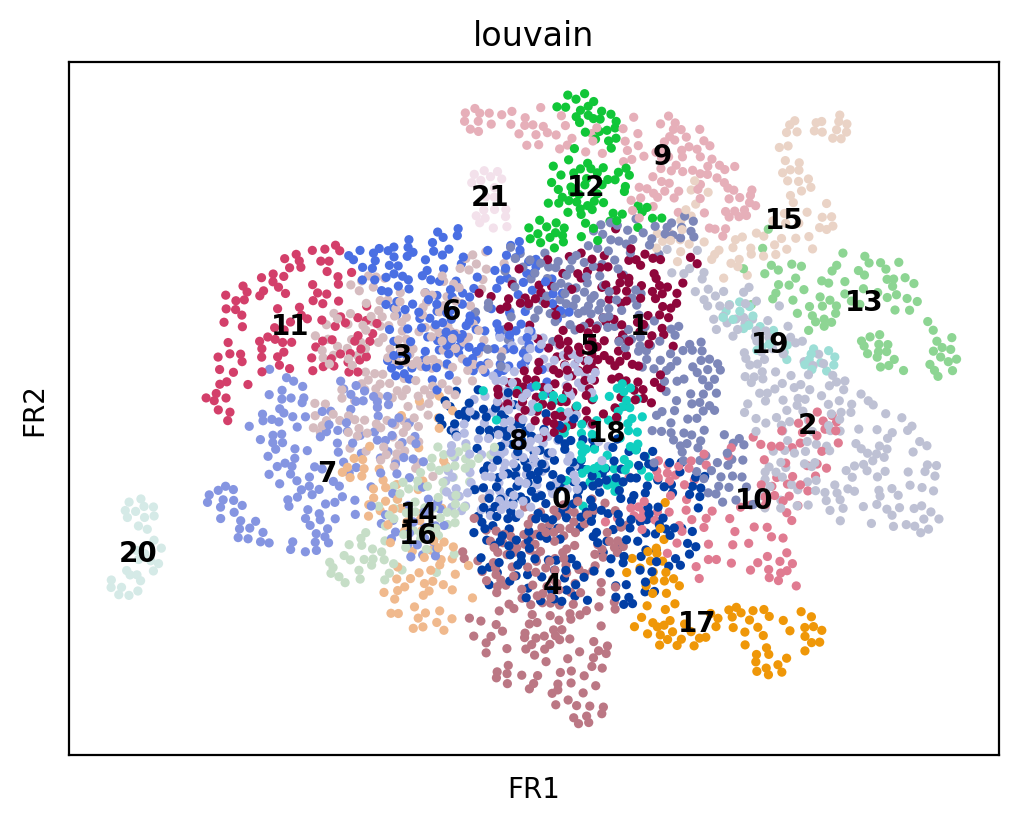

In [13]:
sc.pl.draw_graph(adata, color='louvain', legend_loc='on data')